# Import Libraries

In [1]:
import os
import pandas as pd
from utils.lstm_model_ss import LSTMModel

# Import The Dataset

In [2]:
df_list = []

for i in range(1, 4):
    df = pd.read_csv(
        f"./dataset/nprepros_pond{i}_linear.csv", index_col=0, parse_dates=True
    )
    df_list.append(df)

dataset = pd.concat(df_list)

In [3]:
# dataset = pd.read_csv(data_path, index_col=0, parse_dates=True)
test_dataset = pd.read_csv(
    "./dataset/nprepros_pond4_linear.csv", index_col=0, parse_dates=True
)

# Hyperparameters

In [4]:
# Model Parameters
NUM_OF_LAYERS: int = 2
NUM_OF_NEURONS_FOR_EACH_LAYER: tuple = (64, 32)
DROPOUT_REGULARIZATION: tuple = (0.2, 0.2)
ACTIVATION_FUNCTION = "tanh"
OPTIMIZER = "adam"
METRICS: tuple = ('mae', 'mean_squared_error', 'accuracy') # loss, metrics[0], metrics[1]
SHUFFLE: bool = True
EPOCHS: int = 50

# Dataset Parameters
DATASET = dataset.drop(dataset.columns[-2:], axis=1)
TEST_DATASET = test_dataset.drop(test_dataset.columns[-2:], axis=1)
TRAIN_SIZE: float = 0.8
BATCH_SIZE: int = 32
BUFFER_SIZE: int = len(DATASET)
INPUT_WIDTH: int = 1

# LSTM Class Instantiation

In [5]:
astrid: LSTMModel = LSTMModel()

astrid.num_layers = NUM_OF_LAYERS
astrid.num_neurons = NUM_OF_NEURONS_FOR_EACH_LAYER
astrid.dropout_regularization = DROPOUT_REGULARIZATION
astrid.hyperparameters = (
    ACTIVATION_FUNCTION,
    METRICS,
    OPTIMIZER,
    BATCH_SIZE,
    EPOCHS,
    BUFFER_SIZE,
    INPUT_WIDTH,
    len(DATASET.columns),
)
astrid.dataset = (DATASET, TRAIN_SIZE, SHUFFLE)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 1, 128)           36352     
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 1, 128)            0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 6)                 390       
                                                                 
Total params: 77,958
Trainable params: 77,958
Non-traina

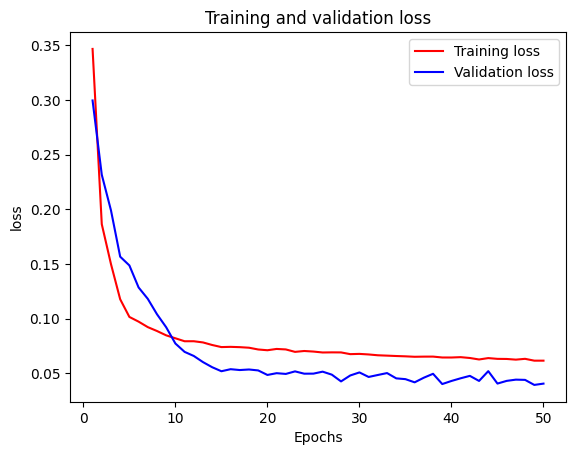

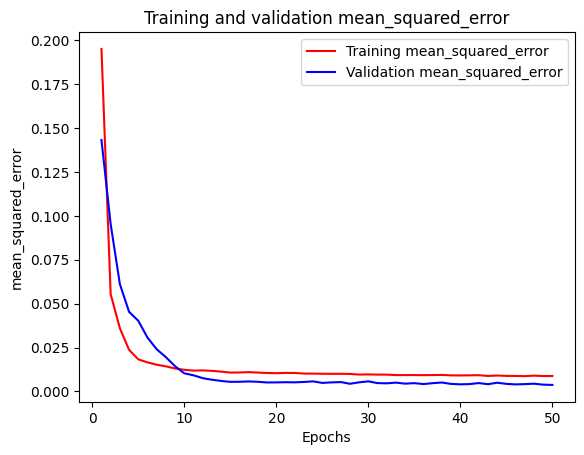

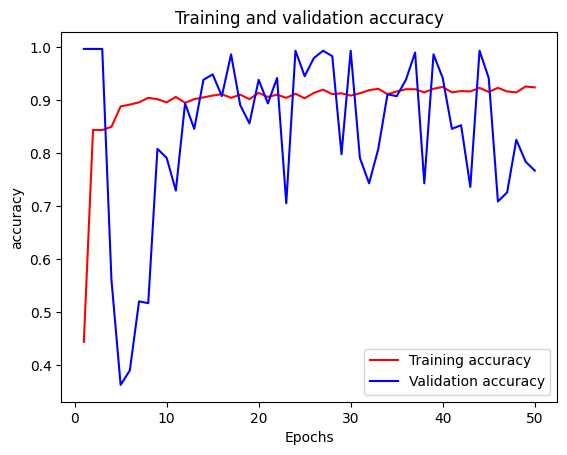

In [6]:
astrid.model()
astrid.inspect()  # TRUE, TRUE, TRUE
astrid.train()
astrid.plot_history()

loss: 0.06524815410375595
mean_squared_error: 0.009206765331327915
accuracy: 0.9655172228813171


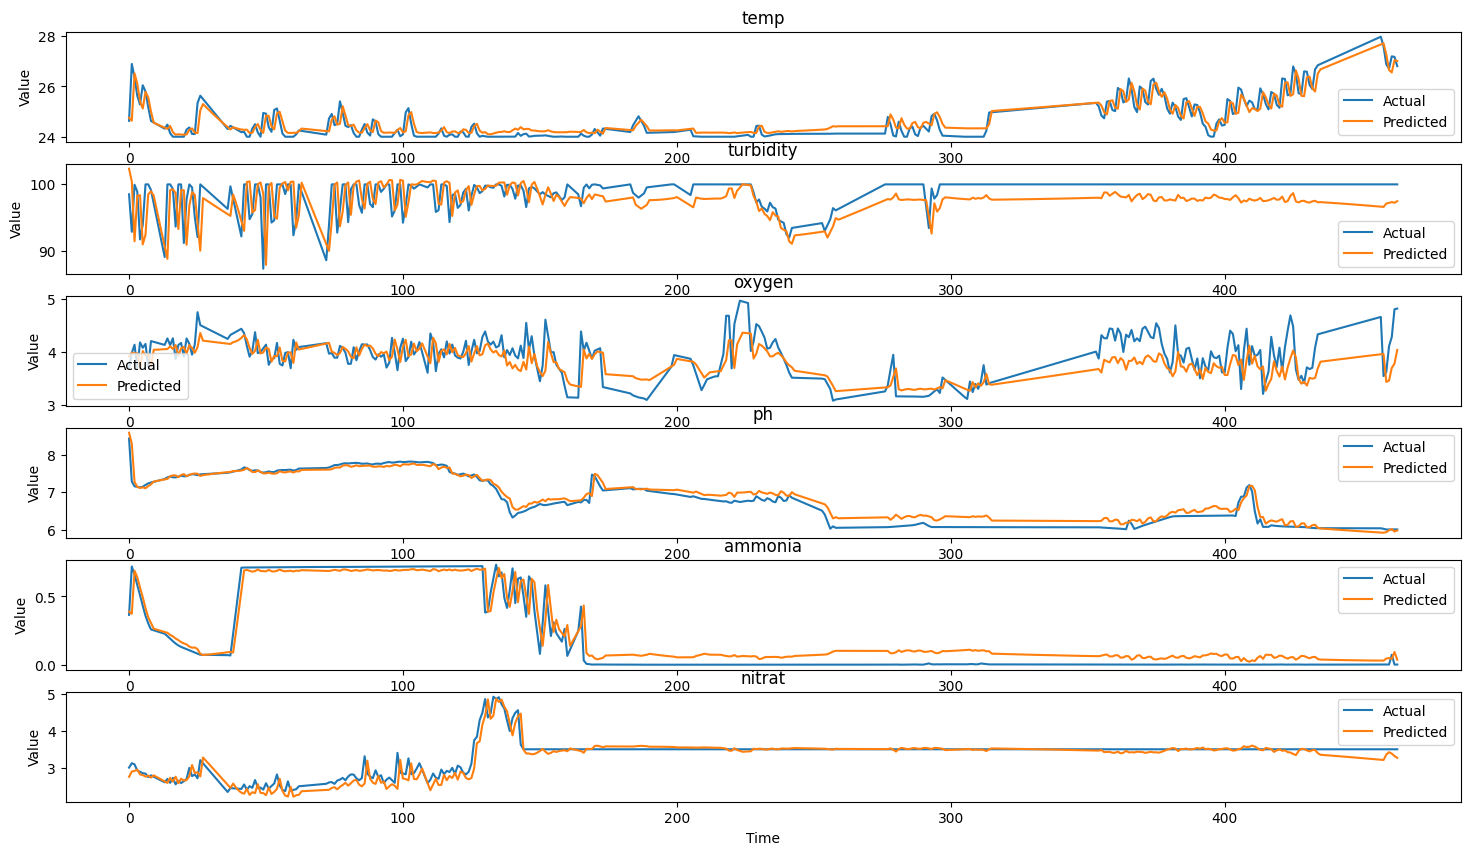

In [7]:
astrid.predict(TEST_DATASET)

In [8]:
model_dir = os.listdir()

if 'models' not in model_dir:
    os.mkdir('models')

astrid.save('models/final_model.h5', 'h5')